In [2]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import folium
from folium import plugins 
from folium.plugins import HeatMap
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
! pip install telethon
from telethon.sync import TelegramClient

In [3]:
df = pd.read_csv("/Users/Admin/Desktop/Elon-Musk-Cryptocurrency-Influence/data_processing/tweets_data/oldtweets.csv")
df = df.drop('Unnamed: 0', axis=1)
df.head()
df['DATE'] = pd.to_datetime(df['DATE'])

In [4]:
df['DATE'] = df['DATE'].dt.floor('H')
df['DATE'] = df['DATE'].dt.strftime("%Y-%m-%d %H:%M:%S")

In [5]:
df.rename(columns={'DATE': 'date'}, inplace=True)
df.head()

,SENDER,MESSAGE,date
0,-1001153434921,@PeterDiamandis Write it on Twitter! Our algor...,2023-05-23 16:00:00
1,-1001153434921,@Kristennetten It’s pretty wild in the Notes w...,2023-05-23 16:00:00
2,-1001153434921,@levelsio Good idea — Elon Musk (@elonmusk) [M...,2023-05-23 14:00:00
3,-1001153434921,@Gfilche @neuralink Human output data rate is ...,2023-05-23 00:00:00
4,-1001153434921,@AviSchiffmann Neuralink — Elon Musk (@elonmus...,2023-05-23 00:00:00


In [6]:
df = df.dropna(subset=['MESSAGE'])
df = df[df['MESSAGE'] != ""]

In [7]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/Admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Admin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/Admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/Admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
df['MESSAGE'] = df['MESSAGE'].str.lower()
df['MESSAGE'] = df['MESSAGE'].apply(lambda x: re.sub(r"(http\S+|www\S+|@\S+)", "", str(x)))
df['MESSAGE'] = df['MESSAGE'].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", str(x)))
df['MESSAGE'] = df['MESSAGE'].apply(lambda x: nltk.word_tokenize(str(x)))
stop_words = set(stopwords.words('english'))
df['MESSAGE'] = df['MESSAGE'].apply(lambda x: [word for word in x if word not in stop_words])

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_words

df['MESSAGE'] = df['MESSAGE'].apply(lambda x: lemmatize_text(x))
df['MESSAGE'] = df['MESSAGE'].apply(lambda x: ' '.join(x))
df.to_csv('tweets_data_cleaning.csv', index=False)

df.head()

,SENDER,MESSAGE,date
0,-1001153434921,write twitter algorithm automatically give hig...,2023-05-23 16:00:00
1,-1001153434921,pretty wild note world many intense battle bes...,2023-05-23 16:00:00
2,-1001153434921,good idea elon musk may,2023-05-23 14:00:00
3,-1001153434921,human output data rate absurdly low elon musk may,2023-05-23 00:00:00
4,-1001153434921,neuralink elon musk may,2023-05-23 00:00:00


In [9]:
from textblob import TextBlob

df['sentiment_score'] = df['MESSAGE'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
df.head()

,SENDER,MESSAGE,date,sentiment_score,sentiment
0,-1001153434921,write twitter algorithm automatically give hig...,2023-05-23 16:00:00,0.150,Positive
1,-1001153434921,pretty wild note world many intense battle bes...,2023-05-23 16:00:00,0.325,Positive
2,-1001153434921,good idea elon musk may,2023-05-23 14:00:00,0.700,Positive
3,-1001153434921,human output data rate absurdly low elon musk may,2023-05-23 00:00:00,0.000,Neutral
4,-1001153434921,neuralink elon musk may,2023-05-23 00:00:00,0.000,Neutral


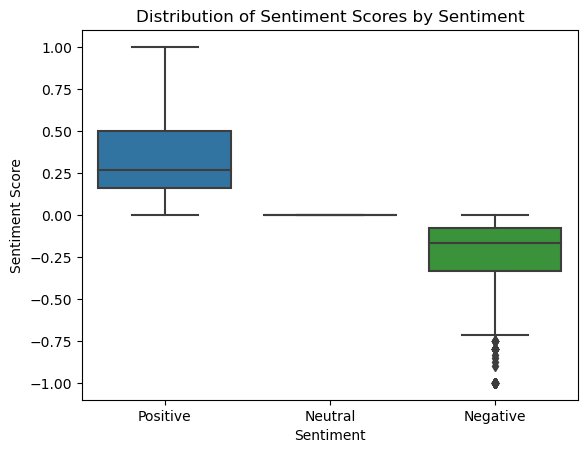

In [10]:
import seaborn as sns

# Plotting box plot
sns.boxplot(x=df['sentiment'], y=df['sentiment_score'])
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.title('Distribution of Sentiment Scores by Sentiment')
plt.show()


In [11]:
btc_dataset = pd.read_csv("/Users/Admin/Desktop/Elon-Musk-Cryptocurrency-Influence/data_processing/crypto_data/btc_data.csv")
btc_dataset.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06
1,1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06
2,1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07
3,1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06
4,1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07


In [17]:
# Keyword Matching for dataseet
crypto_keywords = ["Bitcoin", "BTC", "Crypto", "Cryptocurrency", "Dogecoin", "Bit coin", "Cryptomarket", "Market", "crypto", "bitcoin", "doge", "Doge", "dogecoin", "to the moon", "To the Moon", "₿"]
df['is_crypto_related'] = False

for keyword in crypto_keywords:
    df['is_crypto_related'] |= df['MESSAGE'].str.contains(keyword, case=False)

df = df.sort_values('date')
btc_dataset = btc_dataset.sort_values('date')

# merging the datasets
df['date'] = pd.to_datetime(df['date'])
btc_dataset['date'] = pd.to_datetime(btc_dataset['date'])
merged_data = pd.merge_asof(df, btc_dataset, left_on='date', right_on='date')

In [18]:
merged_data = merged_data.drop('unix', axis=1)
merged_data = merged_data.drop('Volume BTC', axis=1)
merged_data = merged_data.drop('Volume USD', axis=1)

In [19]:
merged_data.head()

,SENDER,MESSAGE,date,sentiment_score,sentiment,is_crypto_related,symbol,open,high,low,close
0,-1001153434921,love science bitch,2018-09-21 05:00:00,0.5,Positive,False,BTC/USD,6543.23,6547.45,6519.56,6531.34
1,-1001153434921,here spec ad cut fun tesla specad elonmusk spa...,2018-09-21 19:00:00,0.3,Positive,False,BTC/USD,6733.72,6775.34,6726.76,6753.09
2,-1001153434921,,2018-09-21 19:00:00,0.0,Neutral,False,BTC/USD,6733.72,6775.34,6726.76,6753.09
3,-1001153434921,probably base built elon musk september,2018-09-21 21:00:00,-0.8,Negative,False,BTC/USD,6708.33,6741.59,6691.28,6713.09
4,-1001153434921,pictwittercomfnhkjduj elon musk september,2018-09-21 21:00:00,0.0,Neutral,False,BTC/USD,6708.33,6741.59,6691.28,6713.09


In [20]:
merged_data = merged_data.dropna(subset=['MESSAGE'])
merged_data = merged_data[merged_data['MESSAGE'] != ""]
merged_data.head()

,SENDER,MESSAGE,date,sentiment_score,sentiment,is_crypto_related,symbol,open,high,low,close
0,-1001153434921,love science bitch,2018-09-21 05:00:00,0.5,Positive,False,BTC/USD,6543.23,6547.45,6519.56,6531.34
1,-1001153434921,here spec ad cut fun tesla specad elonmusk spa...,2018-09-21 19:00:00,0.3,Positive,False,BTC/USD,6733.72,6775.34,6726.76,6753.09
3,-1001153434921,probably base built elon musk september,2018-09-21 21:00:00,-0.8,Negative,False,BTC/USD,6708.33,6741.59,6691.28,6713.09
4,-1001153434921,pictwittercomfnhkjduj elon musk september,2018-09-21 21:00:00,0.0,Neutral,False,BTC/USD,6708.33,6741.59,6691.28,6713.09
5,-1001153434921,mar base alpha pictwittercomollqprfy elon musk...,2018-09-21 21:00:00,-0.8,Negative,False,BTC/USD,6708.33,6741.59,6691.28,6713.09


In [21]:
merged_data.to_csv('final_dataset.csv', index=False)

In [37]:
df2 = pd.read_csv("/Users/Admin/Desktop/Elon-Musk-Cryptocurrency-Influence/data_processing/tweets_data/tweets_data_cleaning.csv")


In [39]:
doge_coin_2019 = pd.read_csv("/Users/Admin/Desktop/Elon-Musk-Cryptocurrency-Influence/data_processing/crypto_data/dogecoin/Kaggle Download/full_data__4__2019.csv")
doge_coin_2020 = pd.read_csv("/Users/Admin/Desktop/Elon-Musk-Cryptocurrency-Influence/data_processing/crypto_data/dogecoin/Kaggle Download/full_data__4__2020.csv")
doge_coin_2021 = pd.read_csv("/Users/Admin/Desktop/Elon-Musk-Cryptocurrency-Influence/data_processing/crypto_data/dogecoin/Kaggle Download/full_data__4__2021.csv")                             

In [40]:
doge_coin_2019['timestamp'] = pd.to_datetime(doge_coin_2019['timestamp'], unit = 's')
doge_coin_2020['timestamp'] = pd.to_datetime(doge_coin_2020['timestamp'], unit = 's')
doge_coin_2021['timestamp'] = pd.to_datetime(doge_coin_2021['timestamp'], unit = 's')

In [41]:
pdList = [doge_coin_2019, doge_coin_2020,doge_coin_2021]  
new_df = pd.concat(pdList)

In [42]:
new_df = new_df.rename(columns = {'timestamp':'date'})
new_df = new_df.set_index("date")
dogecoin_dataset = new_df.resample('1H').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last','Volume':'sum'})
dogecoin_dataset = dogecoin_dataset.reset_index()
dogecoin_dataset.head()
dogecoin_dataset.to_csv('dogecoin_dataset.csv', index=False)

In [43]:
dogecoin_dataset.to_csv('dogecoin_dataset.csv', index=False)

In [56]:
from textblob import TextBlob

df2['sentiment_score'] = df2['MESSAGE'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2['sentiment'] = df2['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
df2.head()

,SENDER,MESSAGE,date,is_crypto_related,sentiment_score,sentiment
20355,-1001153434921,love science bitch,2018-09-21 05:00:00,False,0.5,Positive
20354,-1001153434921,here spec ad cut fun tesla specad elonmusk spa...,2018-09-21 19:00:00,False,0.3,Positive
20350,-1001153434921,probably base built elon musk september,2018-09-21 21:00:00,False,-0.8,Negative
20352,-1001153434921,pictwittercomfnhkjduj elon musk september,2018-09-21 21:00:00,False,0.0,Neutral
20351,-1001153434921,mar base alpha pictwittercomollqprfy elon musk...,2018-09-21 21:00:00,False,-0.8,Negative


In [57]:
# Keyword Matching for dataseet
crypto_keywords = ["Bitcoin", "BTC", "Crypto", "Cryptocurrency", "Dogecoin", "Bit coin", "Cryptomarket", "Market", "crypto", "bitcoin", "doge", "Doge", "dogecoin", "to the moon", "To the Moon", "₿"]
df2['is_crypto_related'] = False

for keyword in crypto_keywords:
    df2['is_crypto_related'] |= df2['MESSAGE'].str.contains(keyword, case=False)

df2 = df2.sort_values('date')
dogecoin_dataset = dogecoin_dataset.sort_values('date')

# merging the datasets
df2['date'] = pd.to_datetime(df2['date'])
dogecoin_dataset['date'] = pd.to_datetime(dogecoin_dataset['date'])
merged_data_d = pd.merge_asof(df2, dogecoin_dataset, left_on='date', right_on='date')

In [58]:
df2 = df2.dropna(subset=['MESSAGE'])
df2 = df2[df2['MESSAGE'] != ""]

In [59]:
merged_data_d.head()

,SENDER,MESSAGE,date,is_crypto_related,sentiment_score,sentiment,Open,High,Low,Close,Volume
0,-1001153434921,love science bitch,2018-09-21 05:00:00,False,0.5,Positive,NaN,NaN,NaN,NaN,NaN
1,-1001153434921,here spec ad cut fun tesla specad elonmusk spa...,2018-09-21 19:00:00,False,0.3,Positive,NaN,NaN,NaN,NaN,NaN
2,-1001153434921,probably base built elon musk september,2018-09-21 21:00:00,False,-0.8,Negative,NaN,NaN,NaN,NaN,NaN
3,-1001153434921,pictwittercomfnhkjduj elon musk september,2018-09-21 21:00:00,False,0.0,Neutral,NaN,NaN,NaN,NaN,NaN
4,-1001153434921,mar base alpha pictwittercomollqprfy elon musk...,2018-09-21 21:00:00,False,-0.8,Negative,NaN,NaN,NaN,NaN,NaN


In [47]:
merged_data_d.dropna(subset=['Open'], inplace=True)

In [61]:
merged_data_d.head()

,SENDER,MESSAGE,date,is_crypto_related,sentiment_score,sentiment,open,high,low,close,Volume
0,-1001153434921,love science bitch,2018-09-21 05:00:00,False,0.5,Positive,NaN,NaN,NaN,NaN,NaN
1,-1001153434921,here spec ad cut fun tesla specad elonmusk spa...,2018-09-21 19:00:00,False,0.3,Positive,NaN,NaN,NaN,NaN,NaN
2,-1001153434921,probably base built elon musk september,2018-09-21 21:00:00,False,-0.8,Negative,NaN,NaN,NaN,NaN,NaN
3,-1001153434921,pictwittercomfnhkjduj elon musk september,2018-09-21 21:00:00,False,0.0,Neutral,NaN,NaN,NaN,NaN,NaN
4,-1001153434921,mar base alpha pictwittercomollqprfy elon musk...,2018-09-21 21:00:00,False,-0.8,Negative,NaN,NaN,NaN,NaN,NaN


In [62]:
merged_data_d.to_csv('final_dataset_merged_dogecoin.csv', index=False)